<a href="https://colab.research.google.com/github/milhamm/restaurant-fuzzy-logic/blob/main/Group_2_Fuzzy_Logic_AI_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuzzy Logic - Group 2**


1.   Putra Dharma Bangsa
2.   Dzaki Mahadika Gunarto
3.   Muhammad Ilham Mubarak




In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing the Restaurant Datasets**


In [311]:
data = pd.read_excel("https://github.com/milhamm/restaurant-fuzzy-logic/blob/main/restoran.xlsx?raw=true")

## **Linguistic Variables**


### **Input Linguistic**
Service Quality [0 - 100]:
*   Excellent
*   Okay
*   Bad

Food Quality [0 - 10]:
*   Delicious
*   Okay
*   Less Delicious

### **Output Linguistic**

*   Recommended
*   Average
*   Not Recommended



## **Membership Functions**

In [312]:
def maximum(x, a, b):
  if a < x and x <= b:
    return (x - a) / (b - a)
  if x <= a:
    return 0
  return 1

def minimum(x, a, b):
  if a < x and x <= b:
    return (b - x) / (b - a)
  if x <= a:
    return 1
  return 0

def average(x, a, b, c, d):
  if x <= a or x > d:
    return 0
  if a < x and x < b:
    return (x - a) / (b - a)
  if c < x and x <= d:
    return (d - x) / (d - c)
  return 1

def minimum_service(x):
  s_min_a = 30
  s_min_b = 50
  return minimum(x, s_min_a, s_min_b)

def average_service(x):
  s_avg_a = 45
  s_avg_b = 60
  s_avg_c = 75
  s_avg_d = 80
  return average(x, s_avg_a, s_avg_b, s_avg_c, s_avg_d)

def maximum_service(x):
  s_max_a = 75
  s_max_b = 90
  return maximum(x, s_max_a, s_max_b)

def minimum_food(x):
  f_min_a = 3.5
  f_min_b = 5
  return minimum(x, f_min_a, f_min_b)

def average_food(x):
  f_avg_a = 4.5
  f_avg_b = 5
  f_avg_c = 6.5
  f_avg_d = 7.5
  return average(x, f_avg_a, f_avg_b, f_avg_c, f_avg_d)

def maximum_food(x):
  f_max_a = 7
  f_max_b = 8
  return maximum(x, f_max_a, f_max_b)

## **Service Quality Membership Function**

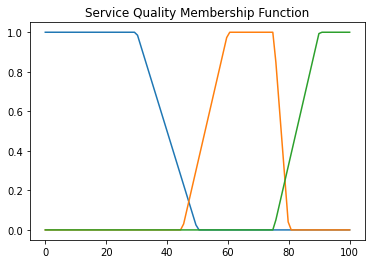

In [313]:
s_x = np.linspace(0, 100, 100)
plt.plot(s_x, [minimum_service(x) for x in s_x])
plt.plot(s_x, [average_service(x) for x in s_x])
plt.plot(s_x, [maximum_service(x) for x in s_x])
plt.title("Service Quality Membership Function")
plt.show()

## **Food Quality Membership Function**

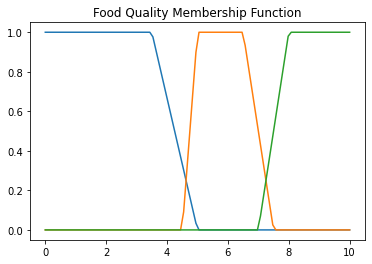

In [314]:
f_x = np.linspace(0, 10, 100)
plt.plot(f_x, [minimum_food(x) for x in f_x])
plt.plot(f_x, [average_food(x) for x in f_x])
plt.plot(f_x, [maximum_food(x) for x in f_x])
plt.title("Food Quality Membership Function")
plt.show()

## **Fuzzification**

In [315]:
def fuzzification(data, linguistic):
  fuzz_res = []

  for item in data:
    fuzz_item = {}

    for key in linguistic:
      fuzz_item[key] = linguistic[key](item)

    fuzz_res.append(fuzz_item)
  
  return fuzz_res

## **Fuzzy Rules**

| service | food | score |
|---------|------| ------|
| Excellent | Delicious | Recommended |
| Excellent | Okay | Recommended |
| Excellent | Less Delicious | Not Recommended |
| Okay | Delicious | Recommended |
| Okay | Okay | Average |
| Okay | Less Delicious | Not Recommended |
| Bad | Delicious | Average |
| Bad | Okay | Not Recommended |
| Bad | Less Delicious | Not Recommended |

## **Inference**

In [316]:
def inference(data, fuzzy_rules, linguistic_output):
  fuz = []
  for items in zip(*data):
    fuz_all = []
    for rule in fuzzy_rules:
      fuz_all.append({
          "label" : rule["label"],
          "score" : min([items[i][x] for i, x in enumerate(rule["rule"])])
      })
    fuz.append(fuz_all)
    
  score = []
  for items in fuz:
    out_obj = {}
    for label in linguistic_output: 
      out_obj[label] = max(item["score"] for item in items if item["label"] == label)
    score.append(out_obj)

  return score

##**Defuzzification**

In [317]:
def defuzzification(item):
  return ((item[RECOMMENDED] * 100) + (item[AVERAGE] * 70) + (item[NOT_RECOMMENDED] * 50)) / (item[RECOMMENDED] + item[AVERAGE] + item[NOT_RECOMMENDED])

## **Main Program**

In [318]:
if __name__ == "__main__":

    # Constant, Rules, and Variables 
    RECOMMENDED = "RECOMMENDED"
    AVERAGE = "AVERAGE"
    NOT_RECOMMENDED = "NOT_RECOMMENDED"

    EXCELLENT = "EXCELLENT"
    OKAY = "OKAY"
    BAD = "BAD"

    DELICIOUS = "DELICIOUS"
    OKAY_FOOD = "OKAY_FOOD"
    LESS_DELICIOUS = "LESS_DELICIOUS"
    
    linguistic_service = {
      EXCELLENT: maximum_service,
      OKAY: average_service,
      BAD: minimum_service
    }
    
    linguistic_food = {
      DELICIOUS: maximum_food,
      OKAY_FOOD: average_food,
      LESS_DELICIOUS: minimum_food
    }

    linguistic_output = (RECOMMENDED, AVERAGE, NOT_RECOMMENDED)

    linguistic  = {
        "pelayanan": linguistic_service,
        "makanan": linguistic_food
    }

    fuzzy_rules = [
      { "label": RECOMMENDED, "rule": (EXCELLENT, DELICIOUS) },
      { "label": RECOMMENDED, "rule": (EXCELLENT, OKAY_FOOD) },
      { "label": NOT_RECOMMENDED, "rule" : (EXCELLENT, LESS_DELICIOUS) },
      { "label": RECOMMENDED, "rule" : (OKAY, DELICIOUS) },
      { "label": AVERAGE, "rule" : (OKAY, OKAY_FOOD) },
      { "label": NOT_RECOMMENDED, "rule" : (OKAY, LESS_DELICIOUS) },
      { "label": AVERAGE, "rule" : (BAD, DELICIOUS) },
      { "label": NOT_RECOMMENDED, "rule" : (BAD, OKAY_FOOD) },
      { "label": NOT_RECOMMENDED, "rule" : (BAD, LESS_DELICIOUS) },
    ]

    # Main Program
    data_temp = data.drop(["id"], axis = 1)
    
    combined_arr = [fuzzification(data[column], linguistic[column]) for column in data_temp]
    score = inference(combined_arr, fuzzy_rules, linguistic_output)
    z = [defuzzification(item) for item in score]

    data["score"] = z
    data = data.sort_values(by=["score", "makanan", "pelayanan"], ascending=False)

    print(data[:10])

    # Export to Excel
    data = data.drop(["pelayanan", "makanan", "score"], axis=1)
    data[0:10].to_excel("peringkat.xls", index=False, header=False)

    id  pelayanan  makanan  score
41  42         94       10  100.0
68  69         86       10  100.0
53  54         64       10  100.0
24  25         61       10  100.0
5    6         59       10  100.0
23  24        100        9  100.0
78  79         87        9  100.0
21  22         79        9  100.0
30  31         74        9  100.0
69  70         78        8  100.0
